In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams['font.size'] = 22
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
column_names = [
    'id', 'attendance', 'tomorrow', 'relevance', 'knowledge', 'teacher', 'rythm',
    'quality', 'quantity', 'difficulty', 'improvements', 'comments', 
    'slack', 'start', 'end', 'network_id'
]

to_drop = ['id', 'attendance', 'tomorrow', 'relevance', 'slack', 'network_id']

df = pd.read_csv('data/responses.csv', parse_dates=['Start Date (UTC)', 'Submit Date (UTC)'])

In [7]:
df.columns = column_names
df = df.drop(to_drop, axis=1)
df

,knowledge,teacher,rythim,quality,quantity,difficulty,improvements,comments,start,end
0,3,4,3,3,2,5,"More mathematical problem, we are in 4th year ...",I will prefer more exercise about data manipul...,2019-04-10 11:33:04,2019-04-10 11:36:56
1,4,4,3,4,3,4,the class are easy to understand so spend less...,\-,2019-04-10 11:32:03,2019-04-10 11:35:36
2,4,4,3,3,3,3,The class was great,The basics where understand,2019-04-10 11:31:53,2019-04-10 11:34:19
3,3,5,5,4,5,5,I dont know,,2019-04-10 11:31:18,2019-04-10 11:34:16
4,5,5,5,5,4,4,Nothing,Maybe a little more explication for mathematic...,2019-04-10 10:50:11,2019-04-10 11:34:12
5,4,5,4,4,4,5,Go faster on some basic code presentation,no,2019-04-10 11:31:37,2019-04-10 11:34:07
6,5,5,4,5,4,5,,The python basic stuff was taking a bit too lo...,2019-04-10 11:31:03,2019-04-10 11:33:05
7,5,5,4,5,5,4,Everything is ok for me,Nothing,2019-04-10 10:47:24,2019-04-10 11:31:24
8,4,5,5,5,5,3,Have a bit more time to do the mathematical ex...,It was very cool !,2019-04-10 10:46:26,2019-04-10 11:04:09


## Histograms

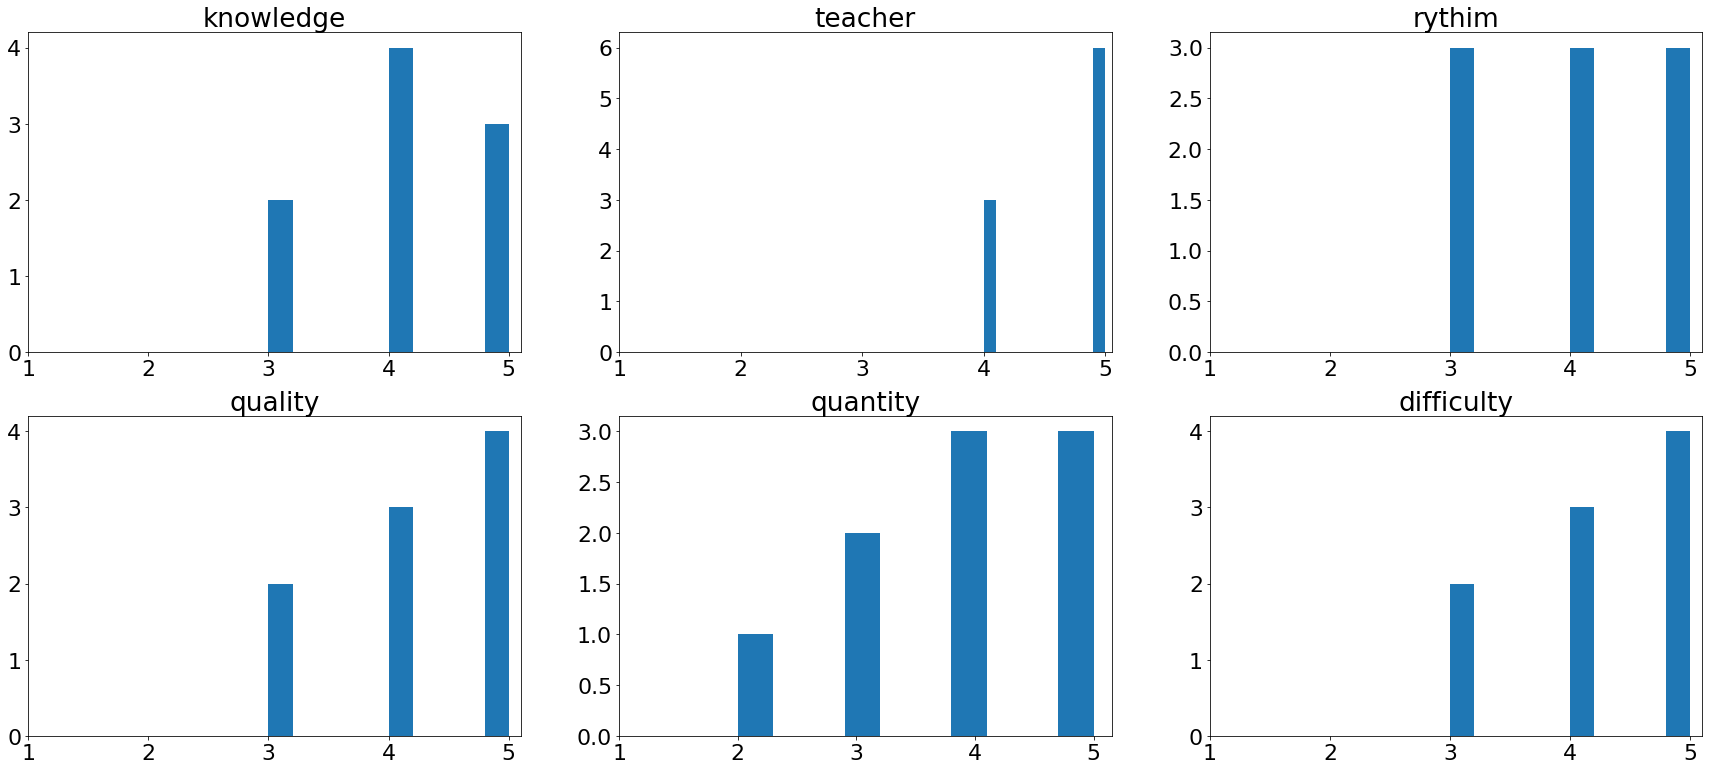

In [8]:
fig = plt.figure()
for i, col in enumerate(['knowledge', 'teacher', 'rythim', 'quality', 'quantity', 'difficulty']):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.set_title(col)
    plt.hist(df[col])
    ax.set_xticks([1, 2, 3, 4, 5])
pass

## Comments

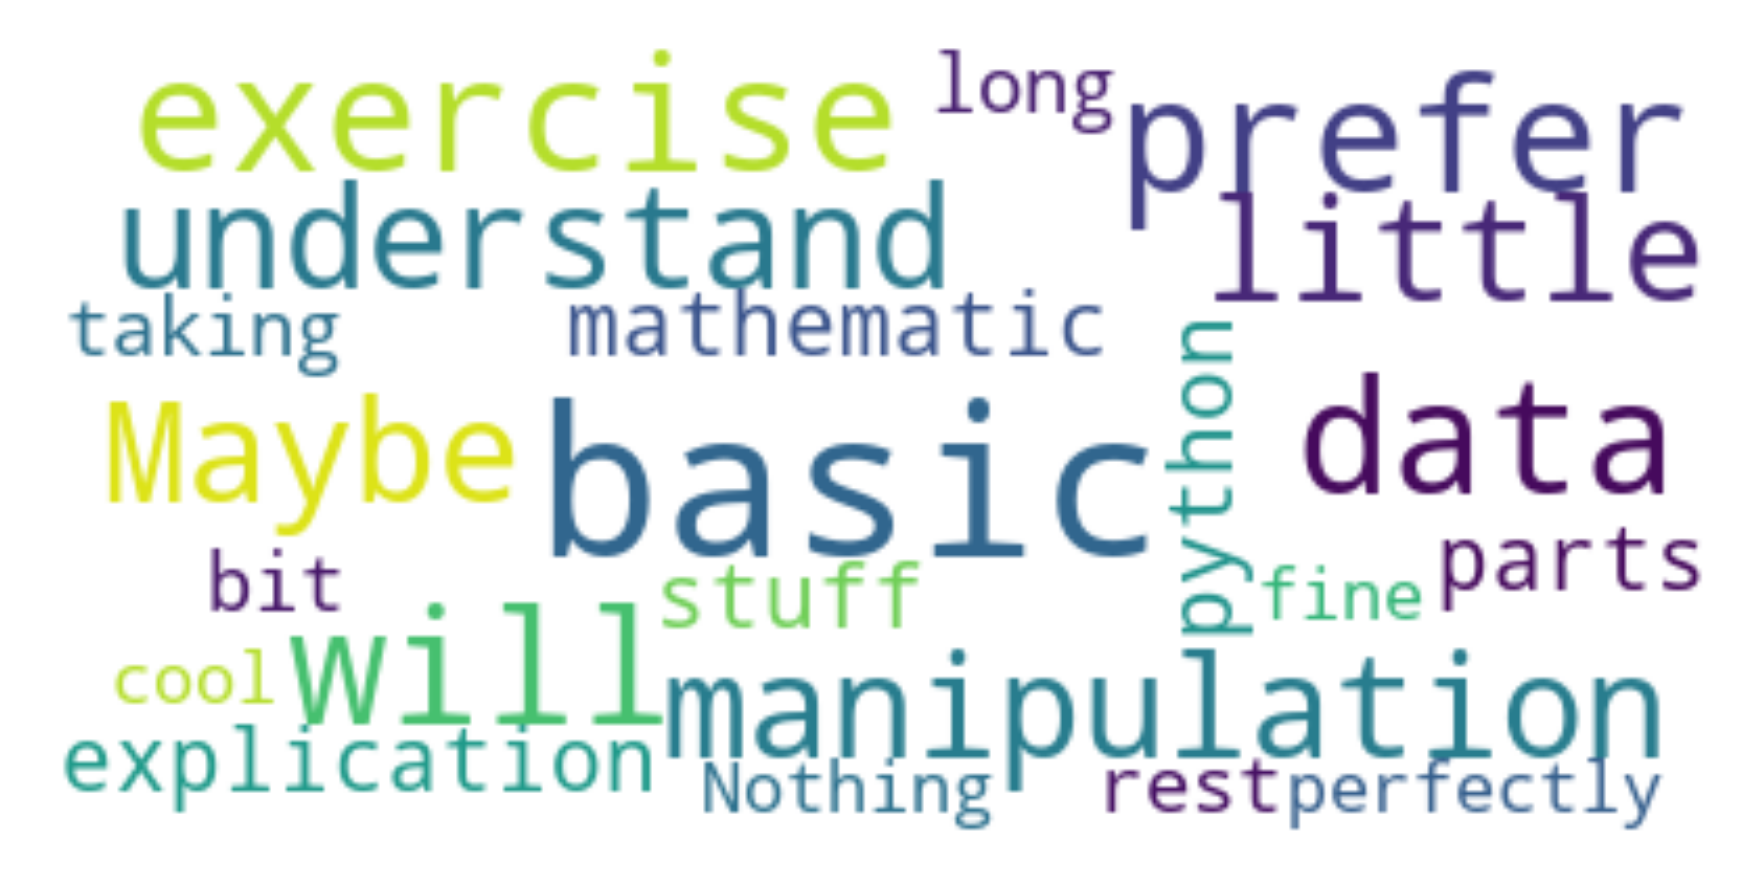

In [9]:
wordcloud = WordCloud(
    max_font_size=50, max_words=100, background_color="white", stopwords=STOPWORDS
).generate(' '.join(df.comments))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Improvements

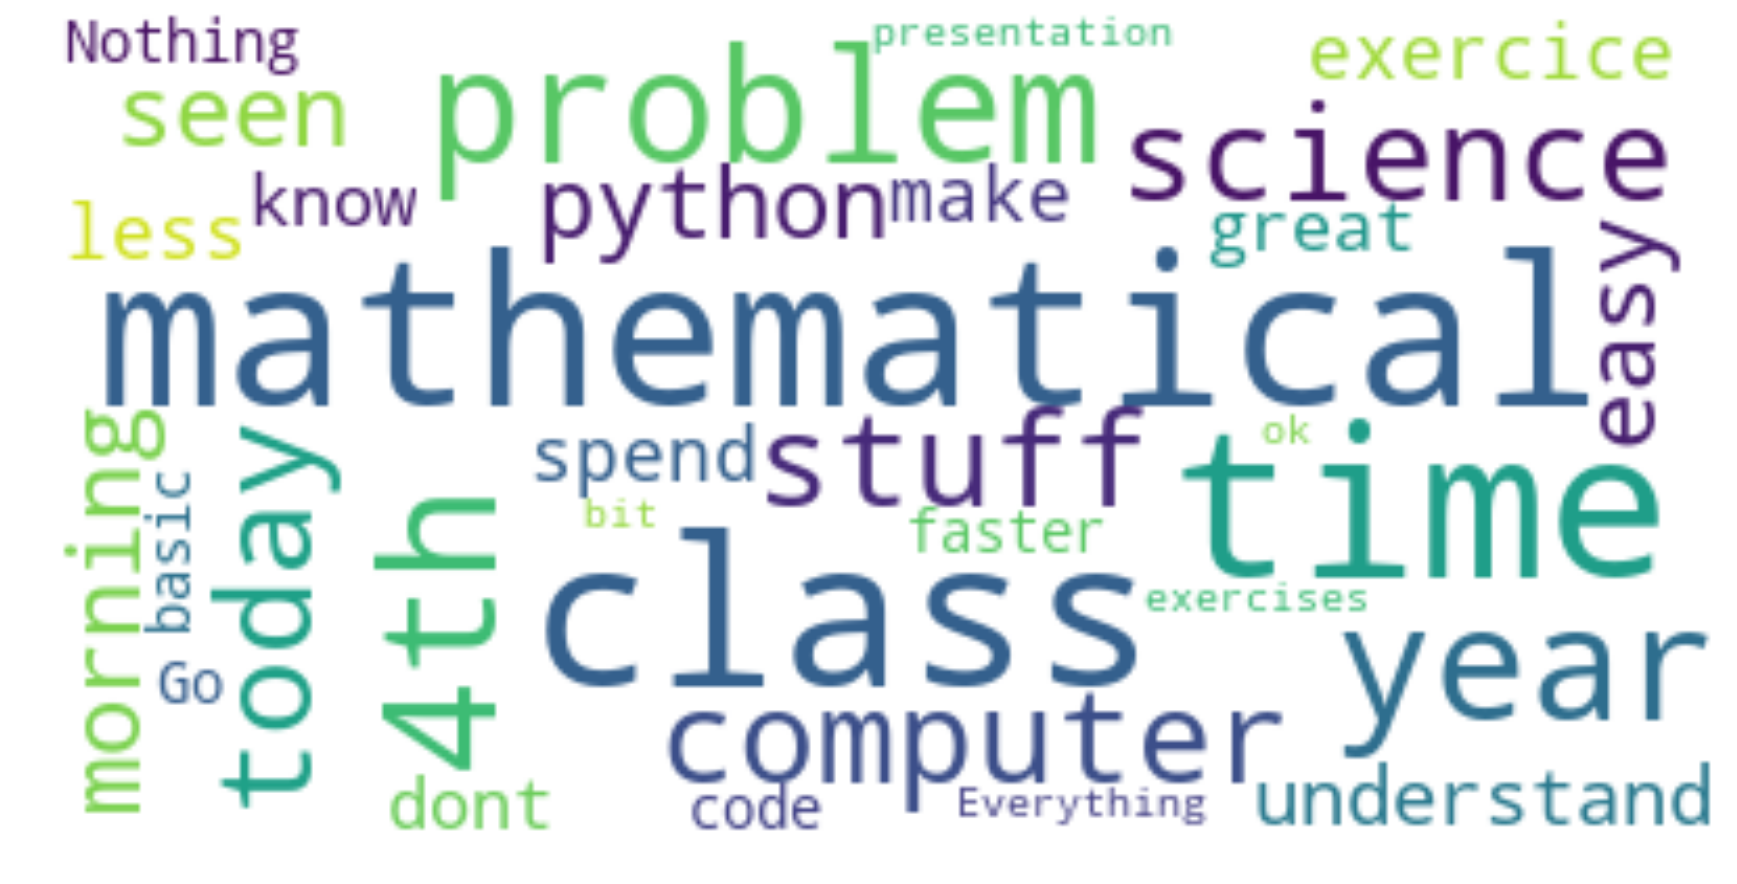

In [10]:
wordcloud = WordCloud(
    max_font_size=50, max_words=100, background_color="white", stopwords=STOPWORDS
).generate(' '.join(df.improvements))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Elapsed times

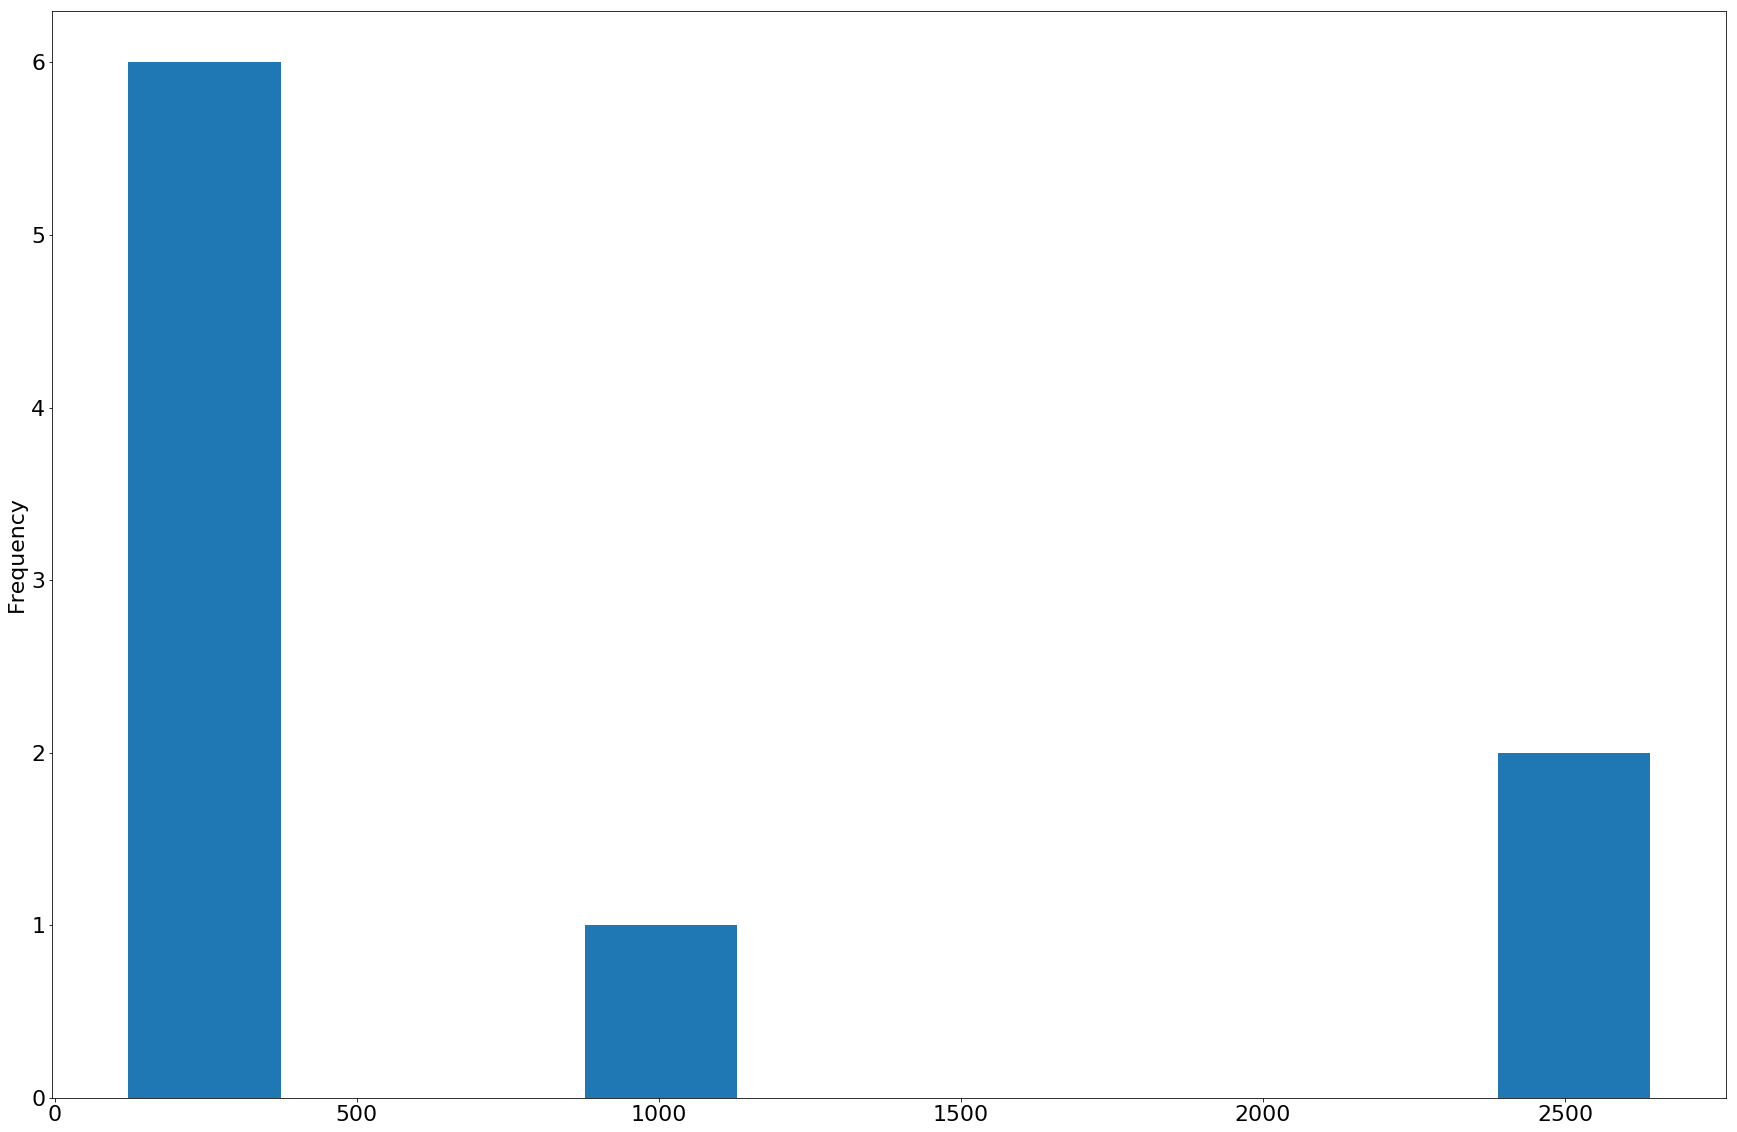

In [14]:
elapsed_times = df.end - df.start
secs = elapsed_times.apply(lambda x: x.total_seconds())
secs.plot(kind="hist")
pass